In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, GlobalMaxPooling2D, Flatten
from tensorflow.keras.models import Model

In [ ]:
#load data
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0, x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print('x_train.shape: ',x_train.shape)
print('y_train.shape: ',y_train.shape)

In [5]:
#number of classes
k=len(set(y_train))
print("no. of classes:",k)

no. of classes: 10


In [8]:
# Build the model using functional API
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [9]:
#compile and fit
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.5258 - accuracy: 0.4451 - val_loss: 1.2719 - val_accuracy: 0.5445
Epoch 2/15
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1861 - accuracy: 0.5752 - val_loss: 1.0560 - val_accuracy: 0.6269
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0283 - accuracy: 0.6333 - val_loss: 0.9692 - val_accuracy: 0.6561
Epoch 4/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9218 - accuracy: 0.6728 - val_loss: 0.9423 - val_accuracy: 0.6717
Epoch 5/15
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8325 - accuracy: 0.7049 - val_loss: 0.9045 - val_accuracy: 0.6881
Epoch 6/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7503 - accuracy: 0.7339 - val_loss: 0.8696 - val_accuracy: 0.6978
Epoch 7/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.6760 - accuracy: 0.7594 - val_loss: 0.8950 - val_ac

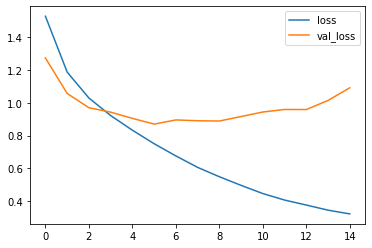

In [10]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

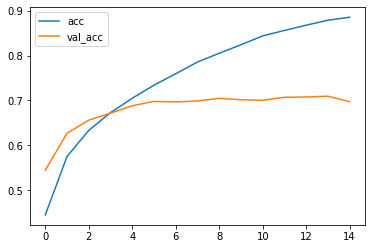

In [11]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

confusion_matrix, without normalization
[[750  30  37  28  14   8   6  12  61  54]
 [ 12 808   4   7   4   6   3   3  16 137]
 [ 70   9 542  92  77  94  41  39  17  19]
 [ 26  19  34 518  61 215  28  44  14  41]
 [ 13   5  59  82 623  74  26  96   8  14]
 [ 14   6  31 159  43 649  13  64   6  15]
 [ 14  12  31 103  72  53 671  22   5  17]
 [ 14   7  20  37  41  80   1 767   3  30]
 [ 55  49   6  18  12  12   3   1 802  42]
 [ 27  68   4  14   2  11   4   8  21 841]]


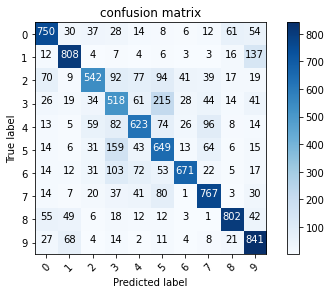

In [12]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion matrix',cmap=plt.cm.Blues):
  """
  This function prints and plots confusion matrix.
  Normalization can be applied by setting 'normalize='True'.
  """
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion_matrix, without normalization')
  print(cm)   
   
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))  


In [13]:
#label mapping
labels=''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

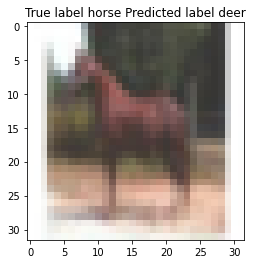

In [15]:
#show some misclassified examples
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label %s Predicted label %s" % (labels[y_test[i]],labels[p_test[i]]));

# TF2.0 CIFAR Improved

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Conv2D, Dropout, GlobalMaxPooling2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.models import Model

In [20]:
#load data
cifar10=tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0, x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()
print('x_train.shape: ',x_train.shape)
print('y_train.shape: ',y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [21]:
# Build the model using functional API
i=Input(shape=x_train[0].shape)
#x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
#x=Conv2D(64,(3,3),strides=2,activation='relu')(x)
#x=Conv2D(128,(3,3),strides=2,activation='relu')(x)

x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(32,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
#x=Dropout(0.2)(x)

x=Conv2D(64,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(64,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
#x=Dropout(0.2)(x)

x=Conv2D(128,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=Conv2D(128,(3,3),activation='relu',padding='same')(i)
x=BatchNormalization()(x)
x=MaxPooling2D((2,2))(x)
#x=Dropout(0.2)(x)
#x=GlobalMaxPooling2D()(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(k,activation='softmax')(x)
model=Model(i,x)

In [22]:
#compile and fit
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)

Epoch 1/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.4652 - accuracy: 0.5098 - val_loss: 1.1783 - val_accuracy: 0.5949
Epoch 2/15
1563/1563 [==============================] - 39s 25ms/step - loss: 1.0683 - accuracy: 0.6274 - val_loss: 1.2089 - val_accuracy: 0.5877
Epoch 3/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8533 - accuracy: 0.7066 - val_loss: 1.7014 - val_accuracy: 0.5113
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6526 - accuracy: 0.7746 - val_loss: 1.1889 - val_accuracy: 0.6291
Epoch 5/15
1563/1563 [==============================] - 38s 25ms/step - loss: 0.5171 - accuracy: 0.8255 - val_loss: 1.3660 - val_accuracy: 0.6286
Epoch 6/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.4210 - accuracy: 0.8583 - val_loss: 1.4646 - val_accuracy: 0.6249
Epoch 7/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.3582 - accuracy: 0.8822 - val_loss: 1.5019 -

In [24]:
#fit data with augmentation
batch_size=32
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True)
train_generator=data_generator.flow(x_train,y_train,batch_size)
steps_per_epoch=x_train.shape[0]//batch_size
r=model.fit_generator(train_generator,validation_data=(x_test,y_test),steps_per_epoch=steps_per_epoch,epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
1562/1562 [==============================] - 48s 31ms/step - loss: 1.3439 - accuracy: 0.5521 - val_loss: 1.1308 - val_accuracy: 0.6271
Epoch 2/50
1562/1562 [==============================] - 48s 31ms/step - loss: 1.1291 - accuracy: 0.6129 - val_loss: 1.0244 - val_accuracy: 0.6496
Epoch 3/50
1562/1562 [==============================] - 48s 31ms/step - loss: 1.0666 - accuracy: 0.6302 - val_loss: 0.9743 - val_accuracy: 0.6775
Epoch 4/50
1562/1562 [==============================] - 48s 31ms/step - loss: 1.0281 - accuracy: 0.6462 - val_loss: 1.2446 - val_accuracy: 0.6205
Epoch 5/50
1562/1562 [==============================] - 48s 31ms/step - loss: 1.0103 - accuracy: 0.6518 - val_loss: 0.9673 - val_accuracy: 0.6806
Epoch 6/50
1562/1562 [==============================] - 48s 31ms/step - loss: 0.9830 - accuracy: 0.6594 - val_loss: 0.9902 - val_accuracy: 0.6683
Epoch 7/50
1562/1562 [==========================

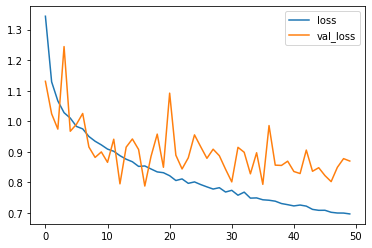

In [25]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

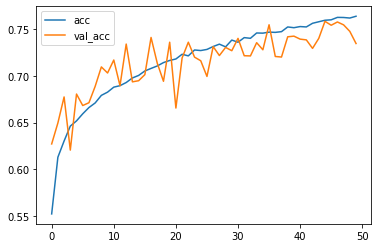

In [26]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

confusion_matrix, without normalization
[[850  16  46   7  11   2  17   6  24  21]
 [ 13 888   3   5   1   1  16   1  23  49]
 [ 64   7 657  51  37  33 112  27   5   7]
 [ 34  19  50 535  53  98 168  24   8  11]
 [ 29   2  77  43 614  20 177  33   5   0]
 [ 25   2  46 215  37 518  94  49   8   6]
 [  7   1  18  27  10   9 920   1   5   2]
 [ 23   6  22  31  45  39  32 788   3  11]
 [ 94  38  16  14   7   3   9   3 783  33]
 [ 61  93   4  15   1   2  13  10   6 795]]


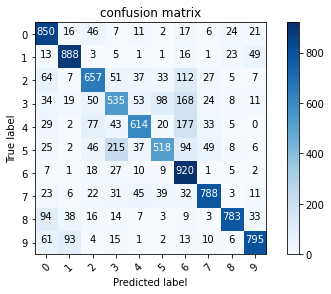

In [27]:
#plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion matrix',cmap=plt.cm.Blues):
  """
  This function prints and plots confusion matrix.
  Normalization can be applied by setting 'normalize='True'.
  """
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('confusion_matrix, without normalization')
  print(cm)   
   
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt='.2f' if normalize else 'd'
  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test=model.predict(x_test).argmax(axis=1)
cm=confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))  

In [28]:
#label mapping
labels=''' airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

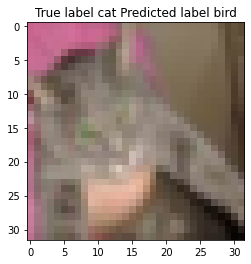

In [29]:
#show some misclassified examples
misclassified_idx=np.where(p_test!=y_test)[0]
i=np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title("True label %s Predicted label %s" % (labels[y_test[i]],labels[p_test[i]]));

In [30]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32768)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              3355